In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

import pickle

In [5]:
df = pd.read_csv('../Daten/sp_xdk.csv', sep=';')

In [6]:
# Richtige Zeit für alle Einträge
df['time'] = [datetime.utcfromtimestamp(x/1000) for x in df['time']]

In [7]:
df['day_number'] = df['time'].dt.day_of_week

In [8]:
df['day_name'] = df['day_number']

In [9]:
df['day_name'].replace(0, "Montag", inplace=True)
df['day_name'].replace(1, "Dienstag", inplace=True)
df['day_name'].replace(2, "Mittwoch", inplace=True)
df['day_name'].replace(3, "Donnerstag", inplace=True)
df['day_name'].replace(4, "Freitag", inplace=True)
df['day_name'].replace(5, "Samstag", inplace=True)
df['day_name'].replace(6, "Sonntag", inplace=True)

In [ ]:
df.head()

,time,buttonpressed,x,y,z,day_number,day_name
0,2022-01-28 10:11:50.881,False,0.159,4.074,0.277,4,Freitag
1,2022-01-28 10:11:51.039,False,0.128,4.097,0.262,4,Freitag
2,2022-01-28 10:11:51.241,False,0.171,4.099,0.260,4,Freitag
3,2022-01-28 10:11:51.369,False,0.158,4.106,0.262,4,Freitag
4,2022-01-28 10:11:51.511,False,0.166,4.123,0.239,4,Freitag


In [ ]:
df.tail()

,time,buttonpressed,x,y,z,day_number,day_name
5610774,2022-02-09 15:57:11.679,False,0.236,0.066,4.267,2,Mittwoch
5610775,2022-02-09 15:57:11.867,False,0.221,0.058,4.265,2,Mittwoch
5610776,2022-02-09 15:57:12.062,False,0.182,0.023,4.277,2,Mittwoch
5610777,2022-02-09 15:57:12.205,False,0.241,0.014,4.265,2,Mittwoch
5610778,2022-02-09 15:57:12.444,False,0.224,0.049,4.280,2,Mittwoch


In [ ]:
# insgesamt 5.610.779 Einträge
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5610779 entries, 0 to 5610778
Data columns (total 7 columns):
 #   Column         Dtype         
---  ------         -----         
 0   time           datetime64[ns]
 1   buttonpressed  bool          
 2   x              float64       
 3   y              float64       
 4   z              float64       
 5   day_number     int64         
 6   day_name       object        
dtypes: bool(1), datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 262.2+ MB


In [ ]:
# keine fehlenden Werte
df.isnull().sum()

time             0
buttonpressed    0
x                0
y                0
z                0
day_number       0
day_name         0
dtype: int64

In [ ]:
# einfache statistische Werte anzeigen lassen. Ausreißer bei y?
print(df.describe())

# ein Eintrag mit ungewöhnlich hohem y
print(df[df['y']>100])

# ein Eintrag mit ungewöhnlich niedrigem y
print(df[df['y']<-100])

                  x             y             z    day_number
count  5.610779e+06  5.610779e+06  5.610779e+06  5.610779e+06
mean   2.558145e-01  5.109091e-02  4.266428e+00  3.007580e+00
std    4.874310e-02  1.001756e+01  1.345958e-01  2.140872e+00
min   -4.632000e+00 -1.677717e+04 -3.996000e+00  0.000000e+00
25%    2.230000e-01  3.400000e-02  4.260000e+00  1.000000e+00
50%    2.490000e-01  4.900000e-02  4.270000e+00  3.000000e+00
75%    2.910000e-01  6.200000e-02  4.281000e+00  5.000000e+00
max    3.341000e+00  1.677721e+04  8.191000e+00  6.000000e+00
                           time  buttonpressed      x             y      z  \
4646434 2022-02-07 12:01:10.466          False  0.354  16777.208984  4.259   

         day_number day_name  
4646434           0   Montag  
                           time  buttonpressed      x             y      z  \
2670898 2022-02-03 00:05:03.619          False  0.214 -16777.171875  4.284   

         day_number    day_name  
2670898           3  Donnerstag 

In [10]:
# diese zwei Einträge entfernen
df.drop(df[df.y < -100].index, inplace=True)
df.drop(df[df.y > 100].index, inplace=True)
df.reset_index(inplace=True)

In [11]:
df.drop(['index'], axis=1, inplace=True)

In [12]:
# Button pressed ist immer False -> kann gelöscht werden
print(df.buttonpressed.value_counts())
df.drop(['buttonpressed'], axis=1, inplace=True)

False    5610777
Name: buttonpressed, dtype: int64


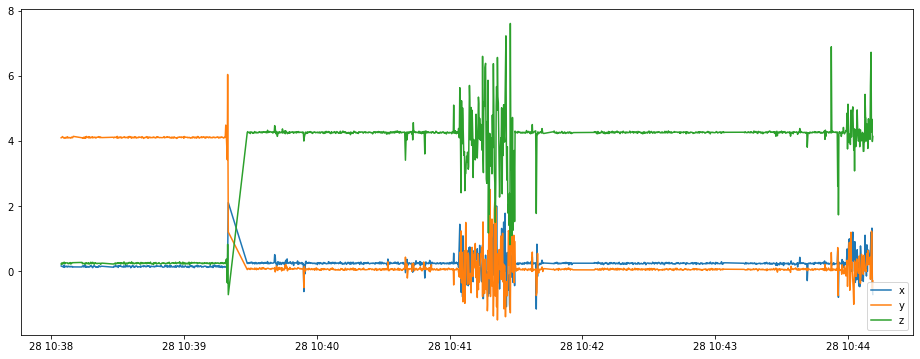

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.time[5500:7000], df.x[5500:7000], label='x')
ax.plot(df.time[5500:7000], df.y[5500:7000], label='y')
ax.plot(df.time[5500:7000], df.z[5500:7000], label='z')

plt.legend(loc=4)

In [ ]:
# zu Beginn sind die Werte von y und z "umgekehrt"
# daher für systematische Berechnung diese ersten Einträge löschen
# eventuell Data Story daraus machen
df[5780:5800]

,time,x,y,z,day_number,day_name
5780,2022-01-28 10:39:17.450,0.140,4.113,0.251,4,Freitag
5781,2022-01-28 10:39:17.690,0.144,4.108,0.235,4,Freitag
5782,2022-01-28 10:39:17.892,0.138,4.093,0.242,4,Freitag
5783,2022-01-28 10:39:18.102,0.130,4.108,0.267,4,Freitag
5784,2022-01-28 10:39:18.312,0.151,4.118,0.242,4,Freitag
5785,2022-01-28 10:39:18.575,0.143,4.113,0.241,4,Freitag
5786,2022-01-28 10:39:18.815,0.126,4.492,0.289,4,Freitag
5787,2022-01-28 10:39:19.115,0.128,4.098,0.377,4,Freitag
5788,2022-01-28 10:39:19.497,0.120,3.427,-0.353,4,Freitag
5789,2022-01-28 10:39:19.670,0.452,6.047,0.830,4,Freitag


In [13]:
df = df.iloc[5791:]

In [14]:
df.reset_index(inplace=True, drop=True)

In [15]:
# Spalte Status definieren, der später für jede Situation einen anderen Wert annimmt
df['Status'] = 0

In [16]:
df.head()

,time,x,y,z,day_number,day_name,Status
0,2022-01-28 10:39:28.532,0.242,0.053,4.267,4,Freitag,0
1,2022-01-28 10:39:28.742,0.245,0.066,4.292,4,Freitag,0
2,2022-01-28 10:39:28.915,0.261,0.092,4.271,4,Freitag,0
3,2022-01-28 10:39:29.237,0.240,0.083,4.260,4,Freitag,0
4,2022-01-28 10:39:29.455,0.270,0.086,4.258,4,Freitag,0


In [ ]:
with open('../02_Daten/Kaffeemaschine/preprocessed_coffee.pickle', 'wb') as handle:
    pickle.dump(df, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[['x','y','z']]))

df_scaled = pd.concat([df, df_scaled], axis=1)
df_scaled.drop(['x','y','z'], axis=1, inplace=True)
df_scaled.rename(columns={0: "x", 1: "y", 2: "z"}, inplace=True)
df_scaled['Status'] = 0
df_scaled.head()

,time,day_number,day_name,Status,x,y,z
0,2022-01-28 10:39:28.532,4,Freitag,0,-0.286314,0.185127,-0.094353
1,2022-01-28 10:39:28.742,4,Freitag,0,-0.224631,0.579710,0.564770
2,2022-01-28 10:39:28.915,4,Freitag,0,0.104340,1.368876,0.011101
3,2022-01-28 10:39:29.237,4,Freitag,0,-0.327435,1.095703,-0.278910
4,2022-01-28 10:39:29.455,4,Freitag,0,0.289387,1.186761,-0.331649


In [ ]:
with open('../Daten/preprocessed_coffee_scaled.pickle', 'wb') as handle:
    pickle.dump(df_scaled, handle, protocol=pickle.HIGHEST_PROTOCOL)